In [1]:
import matplotlib
import matplotlib.pylab as plt
import matplotlib.finance as mpf
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
C:\Users\HP\Anaconda32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

In [22]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
params = [{'q':'AAL'}]
period = "5Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)
df.head()

,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
2013-12-09,23.85,25.44,23.4501,24.60,43197268
2013-12-10,24.50,25.17,24.4100,24.88,18660625
2013-12-11,25.48,27.20,25.3700,25.99,38843371
2013-12-12,26.20,26.71,25.4500,25.45,19981824
2013-12-13,25.75,26.30,25.5201,26.23,12192421


In [71]:
df = get_prices_data(params, period)
df.reset_index(level=0,inplace=True)
df=df.rename(index=str, columns={"index": "Date"})
df.columns

Index(['Date', 'AAL_Open', 'AAL_High', 'AAL_Low', 'AAL_Close', 'AAL_Volume'], dtype='object')

In [72]:
Series = df[['Date','AAL_Close']]

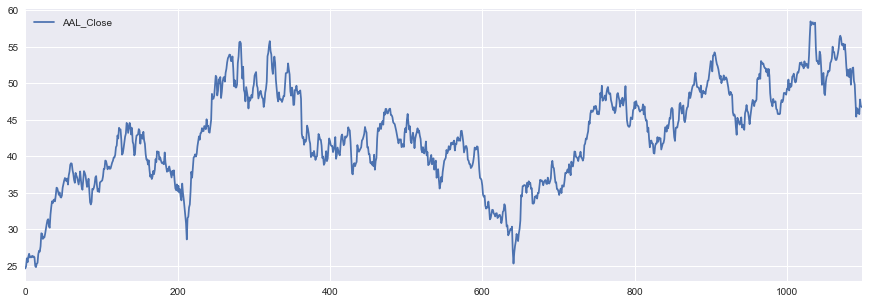

In [55]:
plt.figure(figsize=(15,7))
Series.plot()
plt.show()

In [56]:
#Time Series Plot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly as ply

ply.plotly.sign_in(username='Ranga_Chari', api_key='L9dHdlgu0wpPRNepbtUF')
data = [go.Scatter(x=df.Date, y=df.AAL_Close)]
py.iplot(data)

In [73]:
df['Date'] = pd.to_datetime(df['Date'])
df1= df.set_index('Date')

In [100]:
series2=df1['AAL_Close']
#series2

In [87]:
pd.Series.autocorr(df2,lag=7)

0.92324302532590785

In [88]:
##### autocorrelation_plot(series)
plt.figure(figsize=(15,7))
plt.show()

In [89]:
# fit model
model = ARIMA(df2, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.AAL_Close   No. Observations:                 1099
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -1487.077
Method:                       css-mle   S.D. of innovations              0.936
Date:                Mon, 23 Apr 2018   AIC                           2984.154
Time:                        20:58:55   BIC                           3009.165
Sample:                    12-10-2013   HQIC                          2993.617
                         - 04-23-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0201      0.030      0.664      0.507      -0.039       0.080
ar.L1.D.AAL_Close     0.0613      0.030      2.033      0.042       0.002       0.120
ar.L2.D.AAL_Close     0.

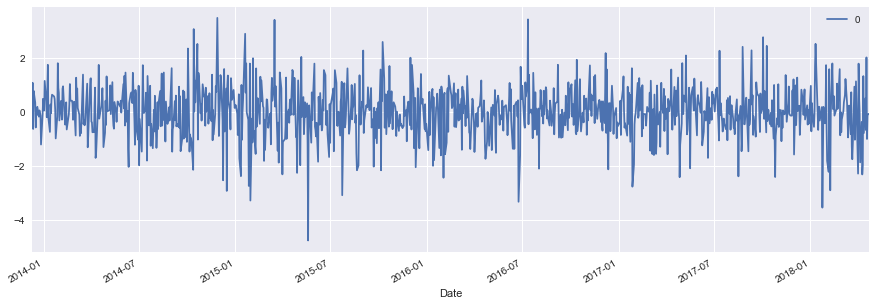

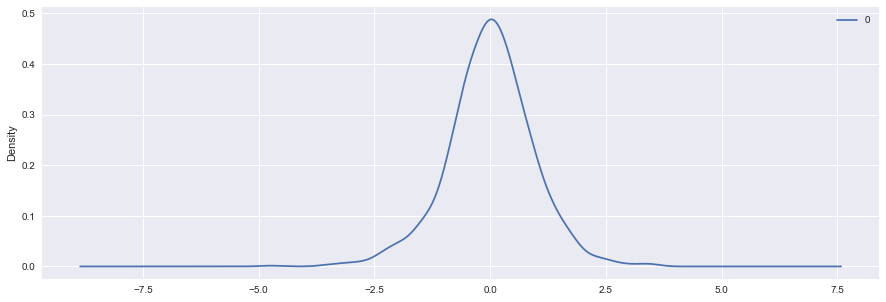

                 0
count  1099.000000
mean     -0.000030
std       0.936724
min      -4.747355
25%      -0.509150
50%       0.011112
75%       0.555689
max       3.469952


In [90]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [150]:
#Rolling Forecast ARIMA Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df2.values
size = int(len(X) * 0.80)
train = X[0:size]
test = X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

R2 = r2_score(test,predictions)
print('R2 of Testing Data=',R2)

predicted=50.943645, expected=51.430000
predicted=51.521988, expected=50.270000
predicted=50.211672, expected=49.480000
predicted=49.400751, expected=49.450000
predicted=49.470346, expected=49.390000
predicted=49.439078, expected=49.110000
predicted=49.133946, expected=48.790000
predicted=48.795802, expected=49.660000
predicted=49.741321, expected=48.030000
predicted=47.989824, expected=48.430000
predicted=48.417969, expected=48.970000
predicted=49.073876, expected=48.630000
predicted=48.648417, expected=48.780000
predicted=48.802668, expected=48.500000
predicted=48.512314, expected=49.250000
predicted=49.309542, expected=49.620000
predicted=49.696259, expected=50.320000
predicted=50.383145, expected=50.390000
predicted=50.426502, expected=51.260000
predicted=51.317204, expected=52.050000
predicted=52.141260, expected=53.030000
predicted=53.117907, expected=52.660000
predicted=52.668490, expected=51.610000
predicted=51.526358, expected=53.800000
predicted=53.930470, expected=53.810000


predicted=52.071622, expected=49.780000
predicted=49.681730, expected=51.470000
predicted=51.548850, expected=52.040000
predicted=52.135941, expected=52.140000
predicted=52.185937, expected=50.290000
predicted=50.182240, expected=49.820000
predicted=49.780131, expected=47.460000
predicted=47.342488, expected=45.400000
predicted=45.249496, expected=46.570000
predicted=46.674134, expected=45.870000
predicted=45.908224, expected=46.400000
predicted=46.461051, expected=45.750000
predicted=45.736650, expected=47.760000
predicted=47.884271, expected=46.880000
predicted=46.898687, expected=46.780000
predicted=46.748030, expected=46.680000
Test MSE: 0.913
R2 of Testing Data= 0.915242541071


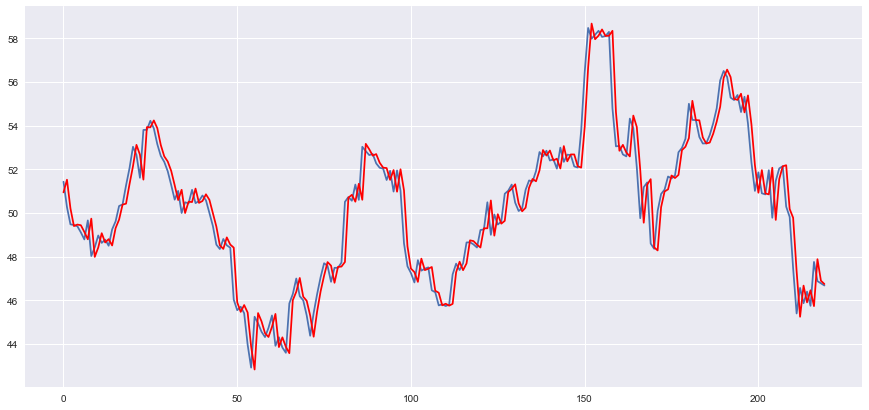

In [93]:
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### Linear Regression

In [132]:
X = df.iloc[:,[1,2,3,5]].values
Y = df.iloc[:,4].values

In [134]:
## fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
regressor = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
Y_predictions = regressor.predict(X_test)
#print(regressor.intercept_)
#print(regressor.coef_)
Y_predictions

In [151]:
import math
test_pred =regressor.predict(X_test)
MSE = mean_squared_error(Y_test,test_pred)
#RMSE = math.sqrt(MSE)
print('MSE of Testing Data=',MSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)

MSE of Testing Data= 0.151836990339
R2 of Testing Data= 0.996558419834


In [153]:
# Predicting the test set results
train_pred =regressor.predict(X_train)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
#RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',MSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)

RMSE of Training Data = 0.13363422689
R2 of Training Data = 0.997056318528


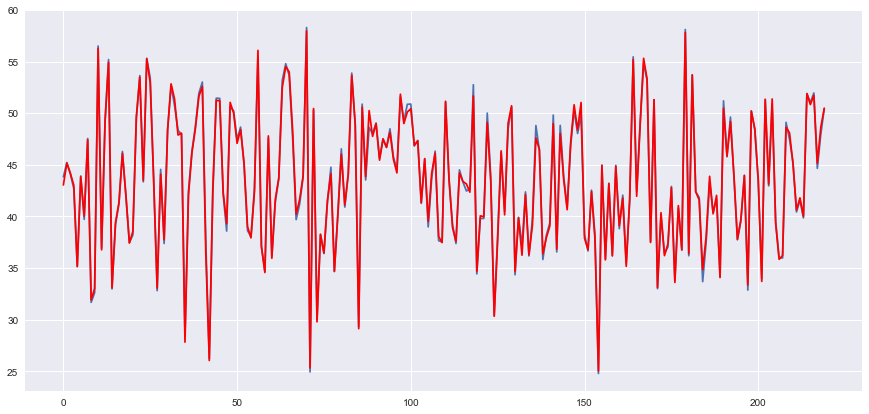

In [144]:
plt.figure(figsize=(15,7))
plt.plot(Y_test)
plt.plot(Y_predictions, color='red')
plt.show()

### Random Forest regressor

In [154]:
X = df.iloc[:,[1,2,3,5]].values
Y = df.iloc[:,4].values

In [155]:
## fitting multiple linear regression to the training set
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
regressor = RandomForestRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [156]:
import math
test_pred =regressor.predict(X_test)
MSE = mean_squared_error(Y_test,test_pred)
#RMSE = math.sqrt(MSE)
print('MSE of Testing Data=',MSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)

MSE of Testing Data= 0.252536291372
R2 of Testing Data= 0.994284799715


In [157]:
# Predicting the test set results
train_pred =regressor.predict(X_train)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
#RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',MSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)

RMSE of Training Data = 0.0419563083427
R2 of Training Data = 0.999077479524


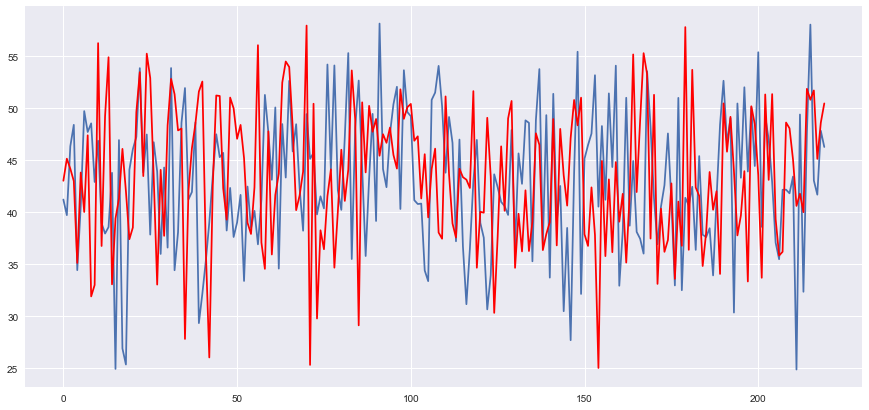

In [158]:
plt.figure(figsize=(15,7))
plt.plot(Y_test)
plt.plot(Y_predictions, color='red')
plt.show()